# Cleaning Data: Missing Data and Dealing with Outliers

![Data Science Workflow](img/ds-workflow.png)

## Cleaning Data
- Understand the **data quality**
- **Improve** the quality (if possible)
- Dealing with **missing data** (both rows in single entries)
    - Examples include 
        - **Replacing** missing values/entries with mean values
        - **Interpolation** of values (in time series)
- Dealing with **data outliers**
    - Examples include 
        - Default missing values in system: sometimes as 0-values
        - Wrong values
- Removing **duplicates**
    - Common problem to have duplicate entries
- Process requires **domain knowledge**

## Missing Data
- Missing data is sometimes refered to as **NA** values in pandas.
- A great source to learn about is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)


- Two types of missing data we consider
    1. NaN data
    2. Rows in time series data

Examples

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'a': [np.nan, 2, 3], 'b':[4,5,np.nan]})
df

,a,b
0,NaN,4.0
1,2.0,5.0
2,3.0,NaN


In [31]:
df = pd.DataFrame([i for i in range(10)], columns=['Data'], index=pd.date_range("2021-01-01", periods=10))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-01-01 to 2021-01-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Data    10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


In [30]:
df = df.drop(["2021-01-03"])

KeyError: "['2021-01-03'] not found in axis"

## Outliers
- Requires domain knowledge
- But typical examples could include

In [23]:
df = pd.DataFrame({'Weight (kg)': [86,83,0,76, 109, 96, 0]})
df

,Weight (kg)
0,86
1,83
2,0
3,76
4,109
5,96
6,0


## Demonstration how it affects results
- [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course/overview)
- The dataset contains a training and testing dataset.
    - The goal is to predict prices on the testing dataset.
- We will explore how dealing with missing values impacts the prediction of a linear regression model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
data= pd.read_csv('files/home-data/train.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
data.shape

(1460, 80)

### Remove non-numeric for this demonstration
```Python
data = data.select_dtypes(include='number')
```

Then we check of missing values.
```Python
data.info()
```

In [41]:
data = data.select_dtypes(include='number')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [44]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Helper function
- Implement a helper function to calculate the r-square score
- It should take independent features `X` and dependent feature `y`
- Then split that into training and testing sets.
- Fit the training set.
- Predict the test set.
- Return the r-square score

In [51]:
def regression_score(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    lin = LinearRegression()
    lin.fit(x_train, y_train)
    y_pred = lin.predict(x_test)
    return r2_score(y_pred, y_test)

### Calculations
- Try first to calcualte the r-square by using `data.dropna()`
    - This serves as the ussual way we have done it
- Then with `data.fillna(data.mean())`
    - [`fillna()`](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.fillna.html) Fill NA/NaN values using the specified method.
- Then with `data.fillna(data.mode().iloc[0])`

In [48]:
test_base = data.dropna()

In [52]:
regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.6548289068325823

In [53]:
test_base = data.fillna(data.mean())
regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.7439346373898318

In [54]:
data.mode()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,60.0,7200,5,5,2006,1950,0.0,0,0,...,0,0,0,0,0,0,0,6,2009,140000


In [55]:
test_base = data.fillna(data.mode().iloc[0])
regression_score(test_base.drop('SalePrice', axis=1), test_base[['SalePrice']])

0.7465420669733793

## Time series
- Now let's explore a time series: `files/weather.parquet`


In [57]:
data = pd.read_parquet('files/weather.parquet')
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Missing time series rows
- One way to find missing rows of data in a time series is as follows
```Python
idx = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq="H"))
mask = idx.isin(df.index)
idx[~mask]
```

In [58]:
idx = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq="H"))

In [59]:
mask = idx.isin(df.index)

In [60]:
idx[~mask]

1     2021-01-01 01:00:00
2     2021-01-01 02:00:00
3     2021-01-01 03:00:00
4     2021-01-01 04:00:00
5     2021-01-01 05:00:00
              ...        
211   2021-01-09 19:00:00
212   2021-01-09 20:00:00
213   2021-01-09 21:00:00
214   2021-01-09 22:00:00
215   2021-01-09 23:00:00
Length: 207, dtype: datetime64[ns]

In [61]:
data.loc['2021-01-01 01:00:00']

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,


### Insert missing datetimess and interpolate them
- To insert missing datetimes we can use [`reindex()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html)
- To interploate values that are missing [`interpolate`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [63]:
w_idx = data.reindex(idx)

In [66]:
w_idx[w_idx['Summary'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-09 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
w_idx.interpolate()[w_idx['Summary'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-09 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Outliers
- If we focus on `Pressure (millibars)` for `2006'
- One way to handle 0-values is with [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
```Python
.replace(0, np.nan)
```
- Then we can apply `interploate()`

In [70]:
(data['Pressure (millibars)'].loc['2006']).isna().any()

False

In [71]:
p_2016 = data['Pressure (millibars)'].loc['2006']

<AxesSubplot:xlabel='Formatted Date'>

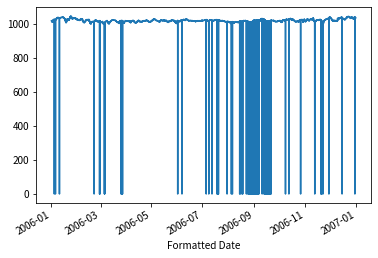

In [72]:
p_2016.plot()

In [73]:
p_2016.isna().any()

False

In [74]:
(p_2016 == 0).any()

True

<AxesSubplot:xlabel='Formatted Date'>

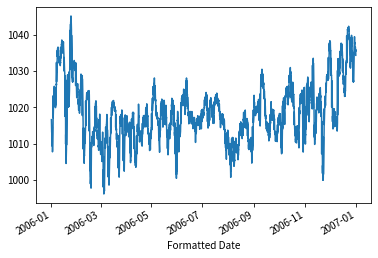

In [78]:
p_2016.replace(0, np.nan).interpolate().plot()

### Removing Duplicates
- [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) Return DataFrame with duplicate rows removed.

In [79]:
df = pd.DataFrame({'a':[1,2,3,2], 'b':[11,2,21,2], 'c':[21,2,31,2]})
df

,a,b,c
0,1,11,21
1,2,2,2
2,3,21,31
3,2,2,2


In [80]:
df.drop_duplicates()

,a,b,c
0,1,11,21
1,2,2,2
2,3,21,31
